# King City House Sales Prediction

1. Load the dataset
2. Identify:
    - Target variable
    - Numerical features
    - Categorical features
3. Handle:
    - Missing values
    - Encoding (if needed)
4. Split data into:
    - Train
    - Test

📌 Explain why data preprocessing is important for stacking.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Load Dataset

In [3]:
path = '../../Data_Source/Kaggle/kc_house_data.csv'
df = pd.read_csv(path)

In [4]:
df.drop('id', axis=1, inplace=True)

# Inspect Dataset

In [5]:
df.shape

(21613, 20)

In [6]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preprocessing

### Handling Outliers

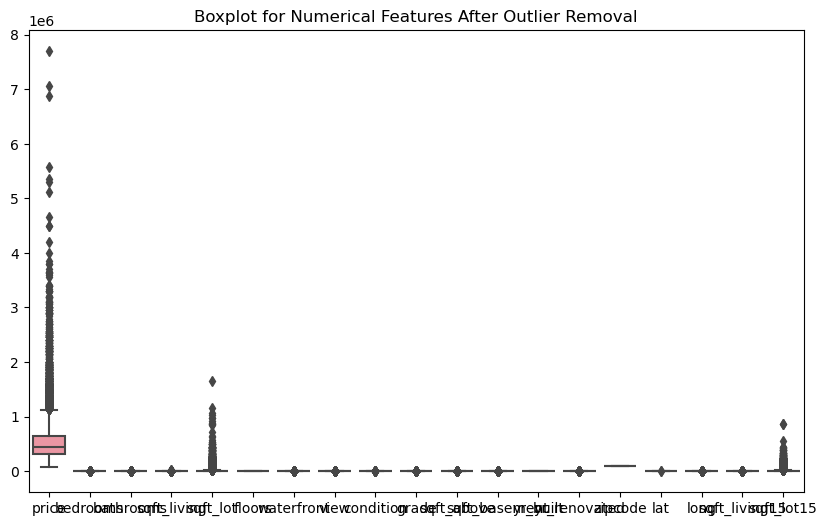

In [9]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Features After Outlier Removal')
plt.show()

In [10]:
# outlier percentages
outlier_percentages = {}
original_shape = df.shape[0]

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (outliers_count / original_shape) * 100
        outlier_percentages[col] = round(percentage, 2)

print("Outlier Percentages:")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}%")

Outlier Percentages:
price: 5.3%
bedrooms: 2.53%
bathrooms: 2.64%
sqft_living: 2.65%
sqft_lot: 11.22%
floors: 0.0%
waterfront: 0.75%
view: 9.83%
condition: 0.14%
grade: 8.84%
sqft_above: 2.83%
sqft_basement: 2.29%
yr_built: 0.0%
yr_renovated: 4.23%
zipcode: 0.0%
lat: 0.01%
long: 1.18%
sqft_living15: 2.52%
sqft_lot15: 10.15%


In [11]:
# deleting outliers
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [12]:
# outlier percentages
outlier_percentages = {}
original_shape = df.shape[0]

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (outliers_count / original_shape) * 100
        outlier_percentages[col] = round(percentage, 2)

print("Outlier Percentages:")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}%")

Outlier Percentages:
price: 1.67%
bedrooms: 0.0%
bathrooms: 0.0%
sqft_living: 0.31%
sqft_lot: 1.31%
floors: 0.0%
waterfront: 0.0%
view: 0.0%
condition: 0.0%
grade: 0.0%
sqft_above: 1.39%
sqft_basement: 1.06%
yr_built: 0.0%
yr_renovated: 0.0%
zipcode: 0.0%
lat: 0.0%
long: 0.32%
sqft_living15: 0.48%
sqft_lot15: 0.25%


### Feature Engineering

In [13]:
df.date = pd.to_datetime(df.date)

In [14]:
df['month'] = df.date.dt.month

In [15]:
df['year'] = df.date.dt.year

### Encoding Features

In [16]:
# 1. Define the maximum value of the cycle (12 for months)
max_val = 12

# 2. Calculate the Sine transformation
df['month_sin'] = np.sin(2 * np.pi * df['month'] / max_val)

# 3. Calculate the Cosine transformation
df['month_cos'] = np.cos(2 * np.pi * df['month'] / max_val)

In [17]:
df[['month', 'month_sin', 'month_cos']].head()

,month,month_sin,month_cos
0,10,-8.660254e-01,0.5
2,2,8.660254e-01,0.5
3,12,-2.449294e-16,1.0
4,2,8.660254e-01,0.5
6,6,1.224647e-16,-1.0


In [18]:
# drop month col after encoding
df.drop('month', axis=1, inplace=True)

In [19]:
# drop date
df.drop('date', axis=1, inplace=True)

In [20]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int32
month_sin        float64
month_cos        float64
dtype: object

### Feature Selection

In [21]:
X = df.drop('price', axis=1)
y = df.price

### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build Base Model

In [34]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=40, n_jobs=1, random_state=42)),
    ('lr', LinearRegression())
]

In [35]:
meta_model = LinearRegression()

## Build Stacking Classifier

In [36]:
regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3
)
regressor.fit(X_train_scaled, y_train)

,estimators,"[('rf', ...), ('lr', ...)]"
,final_estimator,LinearRegression()
,cv,3
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,40
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


## Evaluation

In [37]:
y_pred = regressor.predict(X_test_scaled)

In [38]:
print("R² Score: ", r2_score(y_test, y_pred))

R² Score:  0.8671762832527367


In [39]:
print("MSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  63692.56793350036
